# Conceptual


### 1. Using basic statistical properties of the variance, as well as singlevariable calculus, derive (5.6). In other words, prove that $\alpha$ given by (5.6) does indeed minimize $\text{Var}(\alpha X + (1 - \alpha) Y) $.  

(5.6)
$$
\alpha = \frac{\sigma^2_Y - \sigma_{XY}}{\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}}
$$

The variance of a sum of two random variables is given by:
$$
\text{Var}(aX + bY) = a^2\text{Var}(X) + b^2\text{Var}(Y) + 2ab \, \text{Cov}(X, Y)
$$

Applying this to our variance:
$$
\text{Var}(\alpha X + (1 - \alpha) Y) = \alpha^2\text{Var}(X) + (1 - \alpha)^2\text{Var}(Y) + 2\alpha(1 - \alpha) \, \text{Cov}(X, Y)
$$

<br>

$$
\alpha^2\text{Var}(X) + (1 - \alpha)^2\text{Var}(Y) + 2\alpha(1 - \alpha) \, \text{Cov}(X, Y) =
\alpha^2 \sigma_X^2 + (1 - \alpha)^2 \sigma_Y^2 + 2 \alpha (1 - \alpha) \sigma_{XY}
$$

<br>

If we want to minimize the above equation we have to take derivative of it with respecto to $\alpha$ and equal it to zero.

$$
\frac{d}{d\alpha} \left(\alpha^2 \sigma_X^2 + (1 - \alpha)^2 \sigma_Y^2 + 2 \alpha (1 - \alpha) \sigma_{XY}\right) = 
2\alpha \sigma_X^2 -2\sigma_Y^2 + 2\alpha \sigma_Y^2 + 2\sigma_{XY} - 4\alpha\sigma_{XY}
$$

<br>

$$
2\alpha \sigma_X^2 -2\sigma_Y^2 + 2\alpha \sigma_Y^2 + 2\sigma_{XY} - 4\alpha\sigma_{XY} = 0 \quad \Rightarrow \quad
2\alpha \sigma_X^2 + 2\alpha \sigma_Y^2 - 4\alpha\sigma_{XY} = 2\sigma_Y^2 - 2\sigma_{XY}
$$

$$
\alpha = \frac{\sigma^2_Y - \sigma_{XY}}{\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}}
$$


### 2. We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.
(a) What is the probability that the first bootstrap observation is
not the $j$-th observation from the original sample? Justify your
answer.  

- There are $n$ total observations, and the probability of selecting the $j$-th observation is $\frac{1}{n}$, so the probability of not selecting it is $1 - \frac{1}{n}$

(b) What is the probability that the second bootstrap observation
is not the $j$-th observation from the original sample?  

- The second bootstrap observation is chosen independently from the first, so the probability that the second bootstrap observation is not the $j$-th observation is also: $ 1 - \frac{1}{n} $

(c) Argue that the probability that the $j$-th observation is not in the
bootstrap sample is $ \left(1 - \frac{1}{n}\right)^n $  

- Each observation is selected independently with probability $1 - \frac{1}{n}$ of not being chosen. Since we are making $n$ selections in total, the probability that the $j$-th observation is not selected in any of the $n$ draws is the product of individual probabilities, which gives:  
$$ \left(1 - \frac{1}{n}\right)^n $$

(d) When n = 5, what is the probability that the jth observation is
in the bootstrap sample?  

- Probability of not beeing in bootstrap sample has already been given by: $$ \left(1 - \frac{1}{5}\right)^5 = \left(\frac{4}{5}\right)^5 \approx 0.32768. $$  
Therefore, the probability that the $j$-th observation is in the bootstrap sample is:  
$$  1 - 0.32768 = 0.67232. $$

(e) When n = 100, what is the probability that the jth observation
is in the bootstrap sample?  

$$ 1 - \left(1 - \frac{1}{100}\right)^{100} \approx 0.634 $$

(f) When n = 10, 000, what is the probability that the jth observation is in the bootstrap sample?  

$$ 1 - \left(1 - \frac{1}{10000}\right)^{10000} \approx 0.6321 $$

(g) Create a plot that displays, for each integer value of n from 1 to 100, 000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.  

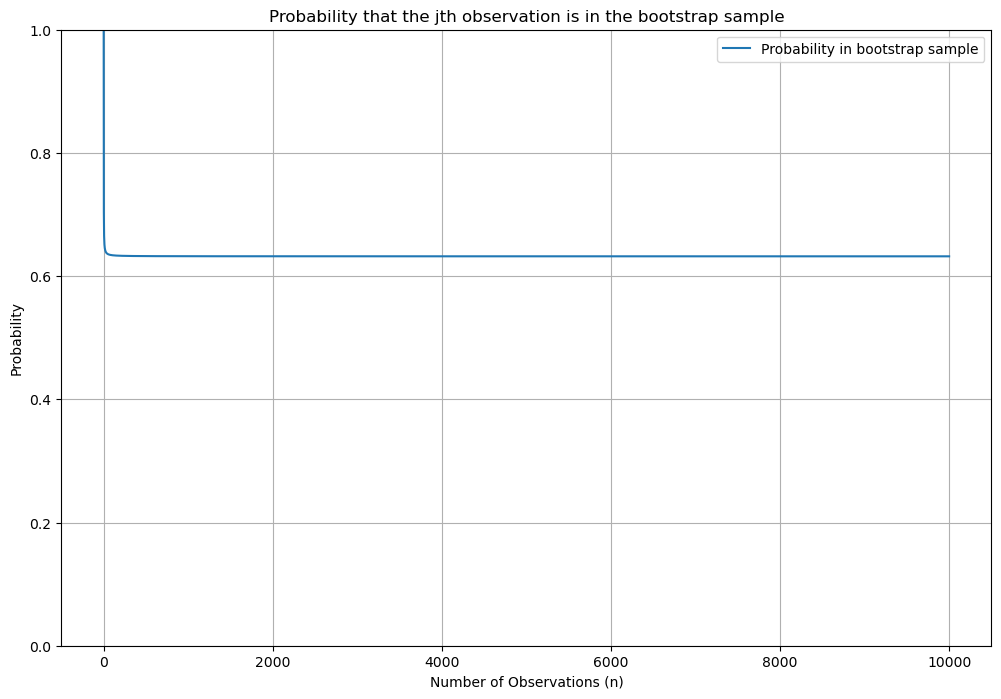

In [75]:
import numpy as np
import matplotlib.pyplot as plt

n_values = np.arange(1, 10001)

prob_in_bootstrap = 1 - (1 - 1 / n_values) ** n_values

plt.figure(figsize=(12, 8))
plt.plot(n_values, prob_in_bootstrap, label='Probability in bootstrap sample')
plt.title('Probability that the jth observation is in the bootstrap sample')
plt.xlabel('Number of Observations (n)')
plt.ylim([0, 1])
plt.ylabel('Probability')
plt.grid()
plt.legend()
plt.show()

# Probability very quickly converges to the value of aproximately 0.632

(h) We will now investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here
j = 4. We first create an array store with values that will subsequently be overwritten using the function np.empty(). We then 
repeatedly create bootstrap samples, and each time we record whether or not the fifth observation is contained in the bootstrap
sample.

In [76]:
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
  store[i] = np.sum(rng.choice(100, size=100, replace=True) == 4) > 0
  
np.mean(store) 

# Again we get the same value

0.6362

### 3. We now review k-fold cross-validation.
(a) Explain how k-fold cross-validation is implemented.  
- Split data into k equal-sized folds
- For each fold:
    - Hold out the fold as the validation set.
    - Train the modle on the remaining k-1 folds.
    - Evaluate the model on the validation fold.
- Average performance across all k folds to get a final estimate.

(b) What are the advantages and disadvantages of k-fold cross-validation relative to:  

i. The validation set approach?
- Advantages of k-fold:
    - Every data point is used for both training and validation.
    - Gives more reliable estimate due to averaging results from all k folds.  

- Disadvantages of k-fold:
    - More computationally expensive.

ii. LOOCV?
- Advatages of k-fold:
    - Less computationally expensive.
    - K-fold cross-validation produces estimates with lower variance.

- Disadvantages of k-fold:
    - Higher bias may sometimes be a problem.

### 4. Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X. Carefully describe how we might estimate the standard deviation of our prediction.

- Create B bootstrap samples from the data 
- For each bootstrap sample, train the model and make predictions on the observations not included in the bootstrap sample.
- Compute the standard deviation of these predictions.


# Applied

In [77]:
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from sklearn.model_selection import train_test_split
from functools import partial
from sklearn.model_selection import (cross_validate, KFold, ShuffleSplit)
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from ISLP.models import sklearn_sm

### 5. In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.  
(a) Fit a logistic regression model that uses income and balance to
predict default.

In [78]:
default_df = load_data('Default')
default_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [79]:
default_df['default'] = default_df['default'].astype('category')
default_df['default01'] = default_df['default'].cat.rename_categories({'No': 0, 'Yes': 1})
default_df['student01'] = default_df['student'].astype('category').cat.rename_categories({'No': 0, 'Yes': 1})


y = default_df['default01']
X = default_df[['income', 'balance']]

X = sm.add_constant(X)

log_default = sm.GLM(y,
                     X,
                     family=sm.families.Binomial())

results = log_default.fit()
summarize(results)


,coef,std err,z,P>|z|
const,-11.540500,0.435000,-26.544,0.0
income,0.000021,0.000005,4.174,0.0
balance,0.005600,0.000000,24.835,0.0


(b) Using the validation set approach, estimate the test error of this
model. In order to do this, you must perform the following steps:  

i. Split the sample set into a training set and a validation set.
  
ii. Fit a multiple logistic regression model using only the training observations.
  
iii. Obtain a prediction of default status for each individual in
the validation set by computing the posterior probability of
default for that individual, and classifying the individual to
the default category if the posterior probability is greater
than 0.5.
  
iv. Compute the validation set error, which is the fraction of
the observations in the validation set that are misclassifed.


In [80]:
def validation_set_method(df, n_splits):

  errors = []
  for i in range(n_splits):
    train_data, val_data = train_test_split(df, test_size=0.3, random_state=i)

    train_X = train_data[['income', 'balance']]
    train_y = train_data['default01']

    val_X = val_data[['income', 'balance']]
    val_y = val_data['default01'].astype('int')

    log_default = sm.GLM(train_y,
                        train_X,
                        family=sm.families.Binomial())

    log_results = log_default.fit()
    val_pred = log_results.predict(val_X)

    val_pred = (val_pred > 0.5).astype('int')
    acc = np.sum(val_pred == val_y) / (len(val_y))
    err = 1 - acc

    errors.append(err)

    print('Validation set number: {0} error: {1:.4f}'.format(i + 1, err))

  return errors

_ = validation_set_method(default_df, 1)


Validation set number: 1 error: 0.0380


(c) Repeat the process in (b) three times, using three diferent splits
of the observations into a training set and a validation set. Comment on the results obtained.

In [81]:
_ = validation_set_method(default_df, 3)

Validation set number: 1 error: 0.0380
Validation set number: 2 error: 0.0303
Validation set number: 3 error: 0.0260


(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable
for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a
dummy variable for student leads to a reduction in the test error rate.

In [83]:
def validation_set_method_dummy(df, n_splits):

  errors = []
  for i in range(n_splits):
    train_data, val_data = train_test_split(df, test_size=0.3, random_state=i)

    train_X = train_data[['income', 'balance', 'student01']]
    train_y = train_data['default01']

    val_X = val_data[['income', 'balance', 'student01']]
    val_y = val_data['default01'].astype('int')

    log_default = sm.GLM(train_y,
                        train_X,
                        family=sm.families.Binomial())

    log_results = log_default.fit()
    val_pred = log_results.predict(val_X)

    val_pred = (val_pred > 0.5).astype('int')
    acc = np.sum(val_pred == val_y) / (len(val_y))
    err = 1 - acc

    errors.append(err)

    print('Validation set number: {0} error: {1:.4f}'.format(i + 1, err))

  return errors

_ = validation_set_method_dummy(default_df, 1)

Validation set number: 1 error: 0.0407


In [84]:
_ = validation_set_method_dummy(default_df, 3)

# Validation set method error is higher for model with dummy variable

Validation set number: 1 error: 0.0407
Validation set number: 2 error: 0.0367
Validation set number: 3 error: 0.0277


### 6. We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coefcients in two diferent ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the sm.GLM() function. Do not forget to set a random seed before beginning your analysis.  

(a) Using the summarize() and sm.GLM() functions, determine the
estimated standard errors for the coefcients associated with
income and balance in a multiple logistic regression model that
uses both predictors.


(b) Write a function, boot_fn(), that takes as input the Default data
set as well as an index of the observations, and that outputs
the coefcient estimates for income and balance in the multiple
logistic regression model.

(c) Following the bootstrap example in the lab, use your boot_fn()
function to estimate the standard errors of the logistic regression
coefcients for income and balance.

(d) Comment on the estimated standard errors obtained using the
sm.GLM() function and using the bootstrap.